In [1]:
import numpy as np
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as constants

import sys
import os

dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"

sys.path.append(dir_BinnedFit)
from gen_mocks import gen_mock_tfCube
from spec2D import Spec2D
from gaussFit import GaussFit
from rotCurveFit import RotFitSingle, RotFitDouble
from chainTool import ChainTool

sys.path.append(dir_KLens)
from KLtool import plot_specs

from IPython.display import display as ipython_display
from binnedFit_utilities import velocity_to_lambda

In [2]:
###### set up parameters ######

line_species='Halpha'

pars = {}
pars['g1'] = 0.05
pars['g2'] = 0.05
pars['sini'] = 0.5

pars['redshift'] = 0.4

pars['aspect'] = 0.2
pars['r_hl_image'] = 0.5
pars['r_hl_spec'] = 0.5

pars['theta_int'] = 0. #np.pi/3.

pars['slitWidth'] = 0.12
pars['ngrid'] = 128

pars['norm'] = 0.0

pars['Resolution'] = 5000.
pars['expTime'] = 60.*30. #60.*30.
pars['pixScale'] = 0.1185
pars['nm_per_pixel'] = 0.033
pars['throughput'] = 0.29
pars['psfFWHM'] = 0.5

pars['area'] = 3.14 * (1000./2.)**2 

pars['vcirc'] = 200.

linelist = np.empty(5,dtype=[('species',np.str_,16),
                                  ('lambda',np.float),
                                  ('flux',np.float)])
linelist['species'] = ['OIIa','OIIb','OIIIa','OIIIb','Halpha']
linelist['lambda'] =  [372.7092,372.9875,496.0295,500.8240,656.461]

fiber_SDSS = np.pi * 1.5**2
refSDSSspec = 3.*1e-17 * u.erg/u.second/u.Angstrom/u.cm**2
refSDSSspec = refSDSSspec.to(u.erg/u.second/u.nm/u.cm**2)

linelist['flux'] = refSDSSspec.value / fiber_SDSS  # [unit: erg/s/cm2/nm/arcsec2]

pars['linelist'] = linelist

# Doublets

In [3]:
dataInfo = gen_mock_tfCube(pars, 'OII', slits='major', noise_mode=1)
spec2D = dataInfo['spec'][0]
RF = RotFitDouble(spec2D)
parFid = dataInfo['par_fid'] ; parFid['slitAngle'] = parFid['slitAngles'][0]

In [4]:
modelFid = RF.forward_model(parFid)
cenLambda, amp, sigma = RF.fit_spec2D(parFid)

/Users/hhg/Research/kinematic_lensing/repo/BinnedFit/notebook/../../BinnedFit/spec2D.py:216: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


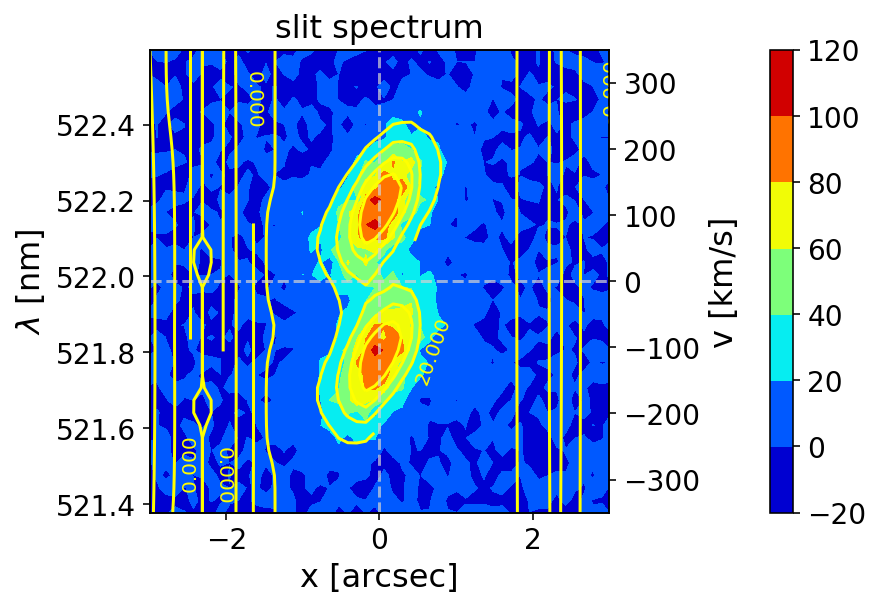

In [5]:
ylim = velocity_to_lambda(v=[-350, 350], lambda0=spec2D.lambda0, z=spec2D.z)
fig, ax = spec2D.display(xlim=[-3., 3.], ylim=ylim, mark_cen=True, model=modelFid)

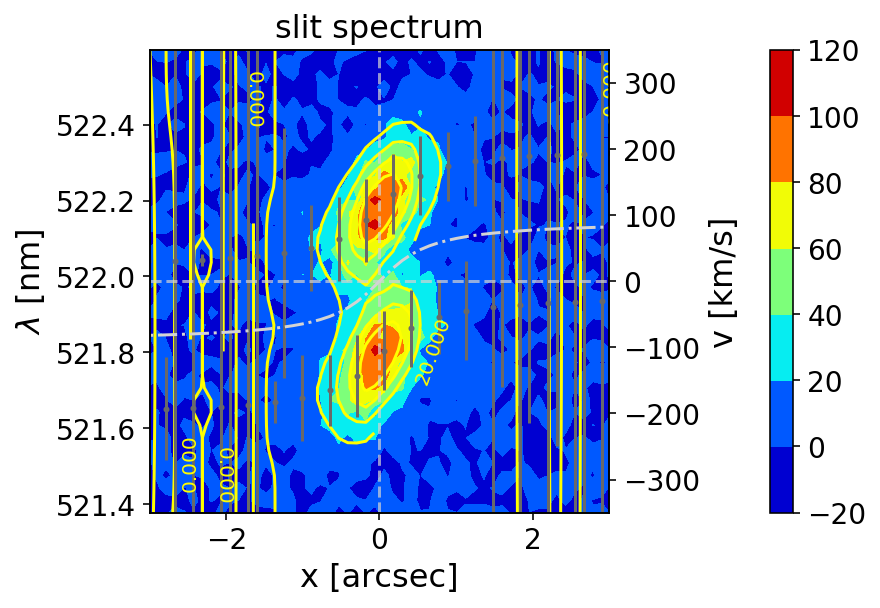

In [6]:
# doublets
peakLambda_up = cenLambda/spec2D.lambda0*RF.lambdaDoublets[1]
peakLambda_lo = cenLambda/spec2D.lambda0*RF.lambdaDoublets[0]

ax.errorbar(spec2D.spaceGrid[1::3], peakLambda_lo[1::3], sigma[1::3], color='dimgray', marker='o', markersize=2, ls='none', label='gaussFit summary')
ax.errorbar(spec2D.spaceGrid[2::3], peakLambda_up[2::3], sigma[2::3], color='dimgray', marker='o', markersize=2, ls='none')
ax.plot(spec2D.spaceGrid, cenLambda, ls='-.', color='lightgray')

ipython_display(fig)

# Singlet

In [7]:
dataInfo = gen_mock_tfCube(pars, 'Halpha', slits='major', noise_mode=0)
spec2D = dataInfo['spec'][0]
RF = RotFitSingle(spec2D)
parFid = dataInfo['par_fid'] ; parFid['slitAngle'] = parFid['slitAngles'][0]

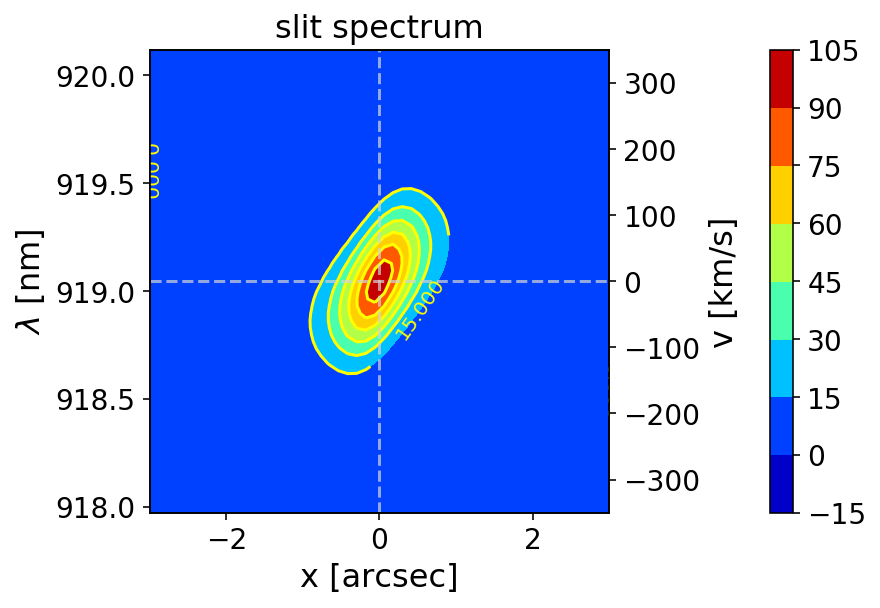

In [8]:
modelFid = RF.forward_model(parFid)
cenLambda, amp, sigma = RF.fit_spec2D(parFid)

ylim = velocity_to_lambda(v=[-350, 350], lambda0=spec2D.lambda0, z=spec2D.z)
fig, ax = spec2D.display(xlim=[-3., 3.], ylim=ylim, mark_cen=True, model=modelFid)


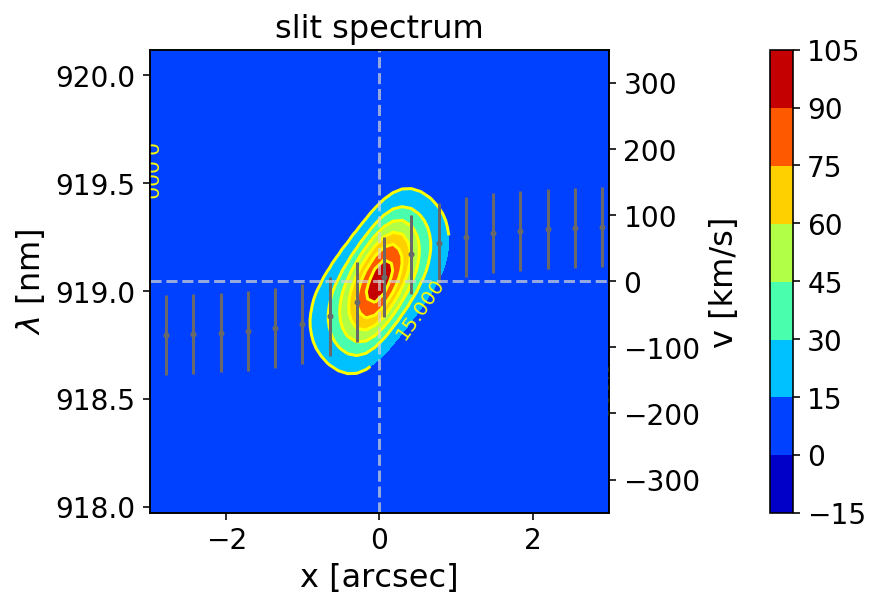

In [9]:
# singlets
ax.errorbar(spec2D.spaceGrid[1::3], cenLambda[1::3], sigma[1::3], color='dimgray', marker='o', markersize=2, ls='none', label='gaussFit summary')
ipython_display(fig)